In [1]:
%load_ext google.cloud.bigquery
%matplotlib inline

# some pandas options
import pandas as pd
pd.set_option("display.expand_frame_repr", False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
%%bigquery fee_buckets
SELECT *
     , sum(txn_count) over (partition by block_timestamp_month) AS total_txns
     , ROUND(txn_count / sum(txn_count) over (partition by block_timestamp_month), 4) AS percent_of_total
  FROM
(
SELECT block_timestamp_month
     , fee AS total_fee
     , COUNT(*) AS txn_count
FROM
  `bigquery-public-data.crypto_bitcoin.transactions`
WHERE TRUE
  AND block_timestamp_month = '2021-06-01' 
  AND is_coinbase IS FALSE
GROUP BY 1,2
)

Downloading: 100%|████████████████████████████████████████████████████████████████████████████| 167979/167979 [00:04<00:00, 40705.61rows/s]


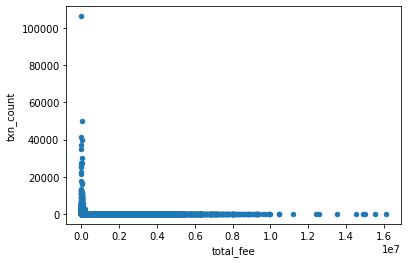

In [4]:
fee_buckets.plot.scatter(x='total_fee', y='txn_count');

In [5]:
fee_buckets.sort_values(by='txn_count', ascending=False).head()

,block_timestamp_month,total_fee,txn_count,total_txns,percent_of_total
6,2021-06-01,678.000000000,106307,6509477,0.0163
14326,2021-06-01,10000.000000000,49968,6509477,0.0077
2871,2021-06-01,330.000000000,41493,6509477,0.0064
2863,2021-06-01,26418.000000000,39909,6509477,0.0061
16164,2021-06-01,204.000000000,37297,6509477,0.0057


In [7]:
%%bigquery all_678
SELECT a.*, outputs / txn_count as avg_outputs 
, inputs / txn_count as avg_inputs
, round(txn_count / b.total_txns, 4) AS percent_total
FROM (
SELECT block_timestamp_month
     , count(*) as txn_count
     , sum(input_count) as inputs
     , sum(output_count) as outputs
     , sum(case when left(a, 1) = '1' then 1 else 0 end) as legacy
     , sum(case when left(a, 1) = '3' then 1 else 0 end) as legacy_script
     , sum(case when left(a, 3) = 'bc1' then 1 else 0 end) as segwit
     , avg(output_value) / 100000000
  FROM
  `bigquery-public-data.crypto_bitcoin.transactions`, UNNEST(inputs) AS i, UNNEST(i.addresses) as a
WHERE TRUE
  AND is_coinbase IS FALSE
  AND fee = 678
GROUP BY 1) a JOIN (
SELECT block_timestamp_month, count(*) as total_txns
    FROM
  `bigquery-public-data.crypto_bitcoin.transactions`
    WHERE TRUE
    AND is_coinbase = FALSE
    GROUP BY 1
) b ON a.block_timestamp_month = b.block_timestamp_month;

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 32.76rows/s]


In [8]:
all_678.sort_values(by='block_timestamp_month')

,block_timestamp_month,txn_count,inputs,outputs,legacy,legacy_script,segwit,f0_,avg_outputs,avg_inputs,percent_total
31,2014-08-01,4,16,8,4,0,0,20.016405860,2.000000,4.000000,0.0000
55,2014-12-01,1,1,2,1,0,0,0.149893220,2.000000,1.000000,0.0000
70,2015-02-01,6,12,12,6,0,0,0.519069367,2.000000,2.000000,0.0000
5,2015-03-01,93,323,166,93,0,0,0.175036925,1.784946,3.473118,0.0000
1,2015-04-01,45,125,82,45,0,0,1.968758312,1.822222,2.777778,0.0000
26,2015-05-01,158,566,308,158,0,0,0.154245159,1.949367,3.582278,0.0000
22,2015-06-01,23,49,43,23,0,0,0.858608606,1.869565,2.130435,0.0000
21,2015-07-01,69,239,138,69,0,0,0.977910549,2.000000,3.463768,0.0000
62,2015-08-01,20,88,29,20,0,0,0.052333507,1.450000,4.400000,0.0000
75,2015-09-01,11,25,20,11,0,0,1.257155192,1.818182,2.272727,0.0000


1. one single address is consumed
2. often times there is a change address generated
3. all legacy addresses
4. sizes seem to be retail sized (no massive amounts)
5. steadily decreasing in size as value goes up
4. all between 2.5 ~ 3.5 sats/vbyte, always equaling 678 for the fee
5. started in 08/2018, went offline for three months in 2021 (feb, march, april)
6. accounts for 2.2% of all monthly transactions on avg (as high as 7%, mostly around 1% ~ 2%)

wallet with coin control?
mixing service? doesn't make sense with change?